# Aufgabe 10 - 3-SAT Problem

Grundlegende Algo. und Verfahren

Tim Brielmayer, Dominik Kienle, Philipp Staudinger

In [209]:
import numpy as np
rng = np.random.default_rng()

################    Parameter   ################

anzahlVariablen = 40
anzahlKlauseln = 60
maxLiteraleProKlausel = 5

maxGenerationen = 50
populationsGroesse = 100
anzahlSelektion = 20
anzahlMutation = 20
anzahlRekombination = 30 #muss eine Gerade Zahl sein
anzahlNeueIndividuen = 30

################################################

In [210]:
def createRandomKNF():      #erstellt eine zufällige KNF
    
    Klauselmenge = []
    
    for i in range(anzahlKlauseln):
        
        numLiterale = rng.integers(low=1, high=(maxLiteraleProKlausel + 1))     #zufällige Zahl zw. 1 & 3, bestimmt wie viele Literale diese Klausel beitzt
        Klausel = []
        
        for k in range(numLiterale):
            
            literal = rng.integers(low = 1, high=(anzahlVariablen + 1))             #zufällige Variable
            literal = -1*literal if rng.integers(low=0, high=2) == 1 else literal   #zufälliges Vorzeichen des Literals
            
            while(literal in Klausel or -1*literal in Klausel):     #falls dieses Literal, oder seine Negation bereits enthalten ist, wird so lange neu "gewürfelt" bis ein nicht vorhandenes gefunden wird
                literal = rng.integers(low = 1, high=(anzahlVariablen + 1))
                literal = -1*literal if rng.integers(low=0, high=2) == 1 else literal
                
            Klausel.append(literal) #Literal wird zur Klausel hinzugefügt
            
        for k in range(maxLiteraleProKlausel - numLiterale):    #füllt den Rest der Klausel mit 0ern auf
            Klausel.append(0)
            
        Klauselmenge.append(Klausel)    #Klausel wird zur Klauselmenge (KNF) hinzugefügt
    
    return Klauselmenge

In [211]:
def printKNF(knf):      #gibt eine KNF in darstellender Weise aus
    
    print('KNF:')
    ausgabe = ''
    for i, klausel in enumerate(knf):
        ausgabe += "("
        for literal in klausel:
            if literal == 0:
                continue
            else:
                variable = abs(literal)
                literal_string = ('x' if literal > 0 else '¬x') + ''.join(chr(8320 + int(digit)) for digit in str(variable))
                ausgabe += literal_string + ' ∨ '

        ausgabe = ausgabe.rstrip(' ∨ ')
        ausgabe += ")" if i == len(knf) - 1 else ") ∧ "

    print(ausgabe, '\n')

In [212]:
def InitPopulation():       #liefert eine zufällige Anfangspopulation
    
    initPopulation = rng.integers(size=(populationsGroesse, (anzahlVariablen + 1)), low=0, high=2)
    for individuum in initPopulation:
        individuum[0] = 0

    return initPopulation

In [213]:
def sortPopulation(population, knf):        #sortiert alle Individuen einer Generation nach der  Anzahl erfüllter Klauseln der KNF

    bewertung = {}  #dictionary speichert die Anzahl erfüllter Klauseln aller Individuen
    
    for i, individuum in enumerate(population):
        
        erfüllteKlauseln = 0
        
        for klausel in knf:     #für jede Klausel der knf
            
            for variable in klausel:    #für jedes Literal der Klausel
                
                if variable > 0 and individuum[variable] == 1:  #Variable positiv & Belegung 1
                    erfüllteKlauseln = erfüllteKlauseln + 1
                    break
                elif variable < 0 and individuum[-1 * variable] == 0:   #Variable negativ & Belegung 0
                    erfüllteKlauseln = erfüllteKlauseln + 1
                    break
                
        bewertung[i] = erfüllteKlauseln     #speichert die Anzahl richtiger Klauseln dieses Individuums

    sortierteIndividuen = dict(sorted(bewertung.items(), key=lambda item: item[1]))     #sortiert das dictionary

    return sortierteIndividuen

In [214]:
def Selektion(sortedPopulation, population):    #selektiert die besten Individuen aus einer Generation
    
    selected = []
    np.array(selected)
    
    for i in range(anzahlSelektion):
        
        #itteriert von hinten durch das Dictionary und speichert die letzten Elemente im array selected
        individuum = population[list(sortedPopulation.keys())[(populationsGroesse - 1)-i]]
        
        selected.extend(individuum)
        
    selected = np.reshape(selected, (anzahlSelektion, (anzahlVariablen + 1)))
    
    return selected

In [215]:
def Mutation(sortedPopulation, population):     #verändert eine zufällige Stelle in manchen Individuen

    mutatedPopulation = []
    
    for i in range(anzahlMutation):
        
        individuum = population[list(sortedPopulation.keys())[(populationsGroesse - 1)-i] ]
        mutationSpot = rng.integers(low=1, high=(anzahlVariablen + 1))  #zufällige Stelle im Individuum
        individuum[mutationSpot] = 1 if individuum[mutationSpot] == 0 else 0    #dreht die Stelle um (1->0 & 0->1)
        
        mutatedPopulation.append(individuum)    #speichert das veränderte Individuum

    return mutatedPopulation

In [216]:
def Rekombination(sortedPopulation, population):    #erstellt neue Individuen durch Rekombiantion aus zwei der aktuell besten Individuen
    
    recombinedPopulation = []
    
    for i in range(int(anzahlRekombination / 2)):
        
        individuum1 = np.array_split(population[list(sortedPopulation.keys())[(populationsGroesse - 1)-i]], 2)
        individuum2 = np.array_split(population[list(sortedPopulation.keys())[rng.integers(low=1, high=21)]], 2)

        new1 = np.concatenate((individuum1[0], individuum2[1]))
        new2 = np.concatenate((individuum2[0], individuum1[1]))

        recombinedPopulation.append(new1)
        recombinedPopulation.append(new2)
        
    return recombinedPopulation

In [217]:
def createNewRandom():      #erstellt neue zufällige Individuen
    
    newRandoms = rng.integers(size=(anzahlNeueIndividuen, (anzahlVariablen+1)), low=0, high=2)
    for individuum in newRandoms:
        individuum[0] = 0
        
    return newRandoms

In [218]:
def Evolution(knf, iterations, startPopulation):    #Programmablauf

    population = startPopulation
    besteIndividuen = []

    for i in range(iterations):
        sortedPopulation = sortPopulation(population, knf)      #sortiert die Population der i. Generation
        
        besteIndividuen.append(list(sortedPopulation.values())[(populationsGroesse - 1)])

        if(list(sortedPopulation.values())[populationsGroesse - 1] == anzahlKlauseln):      #Abbruchkriterium (wenn eine Belegung gefunden wurde, für welche alle Klauseln wahr sind)
            print(f'Erfüllende Belegung gefunden in der {i + 1}. Generation')
            return (population[list(sortedPopulation.keys())[(populationsGroesse - 1)]], besteIndividuen)

        selektion = Selektion(sortedPopulation, population)
        mutation = Mutation(sortedPopulation, population)
        rekombination = Rekombination(sortedPopulation, population)
        newRandoms = createNewRandom()

        newPopulation = np.concatenate((selektion, newRandoms,mutation,rekombination ),  axis=0)    #erstellt eine neue Population aus den 4 angewandten Methoden

        population = newPopulation

    print(f'Nach {maxGenerationen} Generationen wurde keine Erfüllende Belegung gefunden')      #Es wurde keine Belegung gefunden -> wahrscheinlich eine Kontradiktion
    
    return (['Kontradiktion'], besteIndividuen)

In [219]:
def print_marked_knf(knf, belegung):    #gibt die KNF aus, wobei alle Literale, welche unter der Belung w sind, grün geschrieben werden
    
    GREEN = '\033[92m'
    RESET = '\033[0m'

    ausgabe = ''
    
    for i, klausel in enumerate(knf):   #itteriert durch jede Klausel der knf
        
        ausgabe += "("
        
        for literal in klausel:
            
            if literal == 0:
                continue
            else:
                variable = abs(literal)
                literal_string = ('x' if literal > 0 else '¬x') + ''.join(chr(8320 + int(digit)) for digit in str(variable))
                if (literal > 0 and belegung[variable]) or (literal < 0 and not belegung[variable]):
                    ausgabe += GREEN + literal_string + RESET + ' ∨ '
                else:
                    ausgabe += literal_string + ' ∨ '

        ausgabe = ausgabe.rstrip(' ∨ ')
        ausgabe += ")" if i == len(knf) - 1 else ") ∧ "

    print(ausgabe)


In [220]:
import matplotlib.pyplot as plt

def plotEvolution(besteIndividuen):
    x = np.array([])
    y = np.array([])
    
    for i in range(len(besteIndividuen)):
        x = np.append(x, i)
        y = np.append(y, besteIndividuen[i])
    
    (fig, ax) = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    ax.plot(x, y)
    ax.scatter(x, y)

In [221]:
def printBelegung(belegung):    #gibt eine Belegung aus
    for i, variable in enumerate(belegung):
        if i == 0: continue
        
        print(f'x' + ''.join(chr(8320 + int(digit)) for digit in str(i)) + ':', ('w' if variable == 1 else 'f'), end='      ')  #gibt einzelne Varibale aus, z.B. x₁ = w
        if i < 10: print(' ', end='')

        if i%4 == 0: print('\n')    #nach jeweils 4 Variablen ein Zeilenumbruch

    print('\n')

## Testszenarien

### Tautologie

Versucht man eine erfüllende Belegung für eine Tautologie zu finden, ist zu erwarten, dass bereits in der Startpopulation eine Lösung gefunden wird

In [222]:
#Erstellen einer Tautologie
knf = []

for i in range(anzahlKlauseln):
    knf.append([1, -1, 0])      #entspricht der Klausel (x₁ ∨ ¬x₁ ∨ f) -> immer Wahr

startPopulation = InitPopulation()
(belegung, besteIndividuen) = Evolution(knf, maxGenerationen, startPopulation)

print_marked_knf(knf, belegung)

Erfüllende Belegung gefunden in der 1. Generation
(x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁) ∧ (x₁ ∨ ¬x₁)


### Kontradiktion:

Versucht man eine erfüllende Belegung für eine Kontradiktion zu finden, ist zu erwarten, dass auch nach der maximalen Anzahl an Generationen keine Belegung gefunden wurde.

In [223]:
knf = [[1, 0, 0]]       #entspricht der Klausel (x₁ ∨ f ∨ f)

for i in range(anzahlKlauseln - 1):                                      #(x₁ ∨ f ∨ f) ∧ (¬x₁ ∨ f ∨ f) immer falsch
    knf.append([-1, 0, 0])      #entspricht der Klausel (¬x₁ ∨ f ∨ f)

startPopulation = InitPopulation()
(belegung, besteIndividuen) = Evolution(knf, maxGenerationen, startPopulation)

Nach 50 Generationen wurde keine Erfüllende Belegung gefunden


### Zufällige KNF:

KNF:
(¬x₃₁ ∨ ¬x₂₉ ∨ x₂₄ ∨ x₂₂ ∨ ¬x₁₄) ∧ (x₃₇ ∨ ¬x₂ ∨ x₁₁ ∨ ¬x₃₂ ∨ x₁₈) ∧ (x₁₅ ∨ x₂₂ ∨ ¬x₂₉ ∨ x₄₀) ∧ (¬x₁) ∧ (x₃₈ ∨ ¬x₂₇ ∨ x₃₅) ∧ (¬x₂₄) ∧ (x₂₀ ∨ x₂₁) ∧ (x₃ ∨ x₄ ∨ ¬x₃₇ ∨ x₃₂ ∨ x₂) ∧ (x₃₇ ∨ ¬x₃₈ ∨ ¬x₃₀) ∧ (¬x₂₇) ∧ (¬x₂₁ ∨ ¬x₁₇ ∨ ¬x₁₂ ∨ x₄) ∧ (¬x₂₄ ∨ ¬x₆ ∨ x₁₉ ∨ x₃₆) ∧ (¬x₂₆) ∧ (¬x₁) ∧ (x₃₇) ∧ (¬x₄ ∨ x₂₀ ∨ x₂₄ ∨ x₁₆) ∧ (x₃₃) ∧ (x₃₀ ∨ x₂₀ ∨ x₂₅ ∨ x₁₄ ∨ ¬x₃₂) ∧ (¬x₂₂ ∨ ¬x₃₀ ∨ ¬x₁₆) ∧ (¬x₂₃ ∨ ¬x₃₇ ∨ x₈) ∧ (x₂₀ ∨ ¬x₂₈ ∨ x₁₈ ∨ x₁₆ ∨ ¬x₆) ∧ (x₃₆ ∨ x₈) ∧ (x₇) ∧ (¬x₃₂ ∨ ¬x₃₆ ∨ ¬x₁₈ ∨ x₁₄ ∨ x₂₆) ∧ (¬x₁₁ ∨ ¬x₁₇ ∨ x₃₈ ∨ ¬x₃₀ ∨ ¬x₅) ∧ (x₃₈ ∨ ¬x₂₃ ∨ x₁₂) ∧ (¬x₈) ∧ (¬x₃₉ ∨ ¬x₅ ∨ x₂₄) ∧ (¬x₁₂) ∧ (¬x₁₆ ∨ ¬x₃₉ ∨ x₁₈ ∨ ¬x₉) ∧ (¬x₁₁ ∨ x₂ ∨ x₃₂ ∨ ¬x₈) ∧ (¬x₁ ∨ ¬x₃₉) ∧ (x₁₁ ∨ ¬x₃₆ ∨ ¬x₄₀) ∧ (¬x₆ ∨ ¬x₂₀ ∨ x₃ ∨ x₂₄ ∨ x₃₆) ∧ (x₂ ∨ ¬x₄₀ ∨ ¬x₈ ∨ ¬x₃₇ ∨ ¬x₃₄) ∧ (¬x₃₆ ∨ x₇ ∨ x₂₂ ∨ x₂₀) ∧ (¬x₂₇ ∨ x₂₈ ∨ x₃₈) ∧ (¬x₁₈ ∨ x₃₀ ∨ x₄) ∧ (x₂₃ ∨ x₂₄ ∨ ¬x₁₀) ∧ (¬x₈ ∨ ¬x₁₇ ∨ ¬x₂₅ ∨ ¬x₄ ∨ ¬x₂) ∧ (x₃₃ ∨ ¬x₄₀) ∧ (¬x₁₈ ∨ ¬x₄₀ ∨ x₂₅ ∨ ¬x₇) ∧ (x₂₈ ∨ ¬x₁₆ ∨ ¬x₁₈ ∨ ¬x₇) ∧ (x₃₀) ∧ (x₃₁ ∨ ¬x₃₇ ∨ x₅) ∧ (x₂₄ ∨ x₂) ∧ (x₁₆ ∨ ¬x₂₉) ∧ (¬x₃₉) ∧

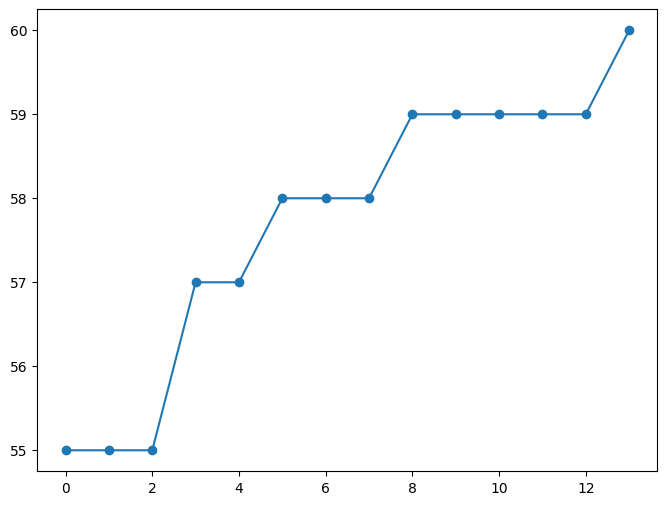

In [224]:
knf = createRandomKNF()
printKNF(knf)

startPopulation = InitPopulation()
(belegung, besteIndividuen) = Evolution(knf, maxGenerationen, startPopulation)

plotEvolution(besteIndividuen)

if belegung[0] != 'Kontradiktion':  #Falls eine Belegung gefunden wurde, diese ausgeben und KNF farblich markieren
    printBelegung(belegung)
    print_marked_knf(knf, belegung)